# Sommaire
<br>1 - Analyse exploratoire structurelle
<br>2 - <a href="#E2">Segmentation 'RM' des clients à facture unique</a>

In [ ]:
import pandas as pd
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

## Tables 'Customers' et 'Orders' :

In [1]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [2]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.loc[orders['customer_id'].duplicated(), 'customer_id'].count()

0

In [8]:
customers.loc[customers['customer_id'].duplicated(), 'customer_id'].count()

0

In [9]:
customers.loc[customers['customer_unique_id'].duplicated(),
              'customer_unique_id'].count()

3345

On voit donc ci-dessus que le customers_id est unique à une facture même si l'acheteur a plusieurs factures dans la base. Il est identifiable par son customers_unique_id.

In [6]:
customers.loc[~customers['customer_unique_id'].duplicated(keep=False),
              'customer_unique_id'].count()

93099

In [7]:
customers.loc[customers['customer_unique_id'].duplicated(keep=False),
              'customer_unique_id'].count()

6342

On a donc 93099 factures qui concernent un achat unique d'un client et 6342 factures pour des clients qui ont au moins deux factures parmis ces 6342. Vu ce chiffre, en regard des 3345 'customer_unique_id' répétés au moins une fois, la grande majorité des clients 'récidivistes' n'ont que deux factures.

In [11]:
orders['order_delivered_customer_date'].describe()

count                   96476
unique                  95664
top       2018-05-08 23:38:46
freq                        3
Name: order_delivered_customer_date, dtype: object

In [15]:
orders['order_delivered_customer_date'].first('1D')

TypeError: 'first' only supports a DatetimeIndex index

In [8]:
orders.sort_values(by='order_delivered_customer_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59102,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2016-10-04 13:11:29,2016-10-04 13:46:31,2016-10-08 13:46:32,2016-10-11 13:46:32,2016-12-06 00:00:00
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04 14:13:22,2016-10-04 14:46:48,2016-10-08 14:46:49,2016-10-11 14:46:49,2016-11-30 00:00:00
56143,d1eb8e4e276a4eea13a5c462c0765e60,9031f9dcde5860b34e6c65ac5c796d30,delivered,2016-10-04 19:30:28,2016-10-06 03:10:33,2016-10-10 03:10:34,2016-10-13 03:10:34,2016-12-06 00:00:00
52382,92b44b87f1f7670b8911c5f0e642435e,e561a3f61440b031d3be286a696d06eb,delivered,2016-10-05 11:08:46,2016-10-06 07:45:47,2016-10-10 07:45:48,2016-10-13 07:45:48,2016-11-25 00:00:00
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05 15:08:00,2016-10-06 15:44:26,2016-10-10 15:44:27,2016-10-13 15:44:27,2016-11-29 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [10]:
orders.loc[~orders['order_delivered_customer_date'].isna(), :]\
.sort_values(by='order_delivered_customer_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59102,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2016-10-04 13:11:29,2016-10-04 13:46:31,2016-10-08 13:46:32,2016-10-11 13:46:32,2016-12-06 00:00:00
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04 14:13:22,2016-10-04 14:46:48,2016-10-08 14:46:49,2016-10-11 14:46:49,2016-11-30 00:00:00
56143,d1eb8e4e276a4eea13a5c462c0765e60,9031f9dcde5860b34e6c65ac5c796d30,delivered,2016-10-04 19:30:28,2016-10-06 03:10:33,2016-10-10 03:10:34,2016-10-13 03:10:34,2016-12-06 00:00:00
52382,92b44b87f1f7670b8911c5f0e642435e,e561a3f61440b031d3be286a696d06eb,delivered,2016-10-05 11:08:46,2016-10-06 07:45:47,2016-10-10 07:45:48,2016-10-13 07:45:48,2016-11-25 00:00:00
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05 15:08:00,2016-10-06 15:44:26,2016-10-10 15:44:27,2016-10-13 15:44:27,2016-11-29 00:00:00
...,...,...,...,...,...,...,...,...
21098,7d09831e67caa193da82cfea3bee7aa5,1409b2945191b7aff1975ba2ce9918c5,delivered,2018-08-05 17:11:44,2018-08-05 17:31:19,2018-08-07 14:44:00,2018-09-25 00:47:25,2018-08-20 00:00:00
43810,a2b4be96b53022618030c17ed437604d,ffa87b4246c4848711afb512bd51f161,delivered,2018-07-22 09:54:03,2018-07-23 11:31:46,2018-07-23 14:48:00,2018-09-27 02:24:33,2018-08-17 00:00:00
92319,b2997e1d7061605e9285496c581d1fbd,9e83d47684eb1a58b1c31830f5de10ac,delivered,2018-07-30 09:08:06,2018-07-30 09:44:33,2018-07-31 12:50:00,2018-10-02 00:18:50,2018-08-14 00:00:00
56635,450cb96c63e1e5b49d34f223f67976d2,27ae7c8a8fc20ce80d96f01b6f19961b,delivered,2018-05-21 06:48:46,2018-05-21 06:57:03,2018-06-01 13:14:00,2018-10-11 16:41:14,2018-06-27 00:00:00


Les accusés de receptions des clients s'étalent donc du 11 oct. 2016 au 17 oct. 2018. On constate qu'ils peuvent avoir plusieurs mois de retard sur la date de livraison transporteur !

In [16]:
orders['order_purchase_timestamp'].describe()

count                   99441
unique                  98875
top       2018-04-11 10:48:14
freq                        3
Name: order_purchase_timestamp, dtype: object

In [17]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [18]:
orders['order_status'].count()

99441

In [19]:
orders.loc[orders['order_delivered_customer_date'].isna(), 'order_status']\
.count()

2965

2965 + 96476 = 99441  (orders['order_delivered_customer_date'].count = 96476)

In [20]:
orders.loc[orders['order_delivered_customer_date'].isna(), 'order_status']\
.value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

A part 6 'cancelled' et 8 'delivered' toutes les factures qui ont une 'order_delivered_customer_date' sont bien des factures 'delivered'

In [22]:
orders.loc[orders['order_delivered_customer_date'].isna(),
           'order_estimated_delivery_date'].count()

2965

In [23]:
orders['order_estimated_delivery_date'].describe()

count                   99441
unique                    459
top       2017-12-20 00:00:00
freq                      522
Name: order_estimated_delivery_date, dtype: object

Une facture acquière donc une 'order_estimated_delivery_date' en même temps qu'une 'order_purchase_timestamp', i.e. à sa création.

In [24]:
orders.loc[(orders['order_delivered_customer_date'].isna()) &\
           (orders['order_status'] == 'delivered'), :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


Des personnes qui ont disparu dans les jours suivants leurs commandes ?? Poursuivons notre exploration :
## Autres tables :

In [6]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [2]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
len(payments['order_id'].unique())

99440

In [7]:
# there is one invoice (99441 - 1 = 99440) which hasn't payment information, which one ?
orders.loc[~orders['order_id'].isin(payments['order_id'].unique()), :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


In [8]:
# Is it for an 'unique order customer' ?
customers.loc[customers['customer_id'] == '86dc2ffce2dfff336de2f386a786e574',
              'customer_unique_id']

21125    830d5b7aaa3b6f1e9ad63703bec97d23
Name: customer_unique_id, dtype: object

In [9]:
customers.loc[customers['customer_unique_id'] == \
              '830d5b7aaa3b6f1e9ad63703bec97d23', :]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP


Oui la facture sans payment concerne un client à commande unique.

In [10]:
payments['payment_sequential'].value_counts()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: count, dtype: int64

In [12]:
payments.loc[payments['payment_sequential'] == 20, :]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
76655,ccf804e764ed5650cd8759557269dc13,20,voucher,1,0.99
83808,285c2e15bebd4ac83635ccc563dc71f4,20,voucher,1,1.09
84310,895ab968e7bb0d5659d16cd74cd1650c,20,voucher,1,4.61
93337,fa65dad1b0e818e3ccc5cb0e39231352,20,voucher,1,150.00


In [13]:
payments.loc[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352', :]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [7]:
payments.loc[payments['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352',\
             'payment_value'].sum()

457.99

In [14]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [1]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [2]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [4]:
len(reviews['order_id'].unique())

98673

In [9]:
items =  pd.read_csv('olist_order_items_dataset.csv')
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [5]:
items.loc[items['order_id'] == 'fa65dad1b0e818e3ccc5cb0e39231352', :]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
110202,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,2017-04-27 09:10:13,392.55,65.44


392,55 + 65,44 = 457,99 c'est à dire le prix que nous avons trouvé dans la table 'payments' pour cette facture; Pour avoir le montant de la facture il faudra donc faire la somme de 'price' et 'freight_value', pour chaque ligne liée à la facture.

In [8]:
products =  pd.read_csv('olist_products_dataset.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<a name='E2'>

**Nous allons réaliser une première segmentation sans faire appel à un algorithme apprenant, selon la logique 'RFM' très utilisée.
<br>Toutefois la fréquence 'F' n'a pas de sens pour les clients à commande unique: elle est inconnue. Nous allons donc faire deux études distinctes, une pour les 'UOC' (Unique Order Customers) et une pour les 'MOC' (Multi-Orders Customers) pour lesquels on peut définir une fréquence**, même si deux commandes (la plupart des cas) est un peu limité pour avoir une valeur significative. **Commençons par les UOC.**
<br>Pour ce premier cas, nous n'aurons besoin que de l'identifiant client ("customers.customer_unique_id"), de la date de sa commande ("orders.order_purchase_timestamp") pour la récence, et du montant total (somme des 'price' et 'freight_value' de "items").

In [3]:
UOC_DF = customers.loc[~customers['customer_unique_id']\
                       .duplicated(keep=False),\
                       ['customer_unique_id','customer_id']]

In [16]:
UOC_DF.count()

customer_unique_id    93099
customer_id           93099
dtype: int64

In [18]:
# How many MOC (Multi-Orders Customers) have we exactly ?
len(customers.loc[customers['customer_unique_id'].duplicated(keep=False),\
                  'customer_unique_id'].unique())

2997

In [19]:
# These MOC are only a little percent of the Customers ! Which one precisely ?
100 * 2997 / (2997 + 93099)

3.118756243756244

In [4]:
# creation of three new columns, filled with temp. values :
UOC_DF[['order_purchase_date','order_id','order_status']] = \
['2020-02-02 20:20:20','temp','temp']

In [5]:
# now fill them with actual values :
for i in range(93099):
    tmp = orders.loc[orders['customer_id'] == UOC_DF.iloc[i,1],\
                     ['order_purchase_timestamp','order_id','order_status']]
    UOC_DF.iloc[i,2] = tmp.iloc[0,0]
    UOC_DF.iloc[i,3] = tmp.iloc[0,1]
    UOC_DF.iloc[i,4] = tmp.iloc[0,2]


In [6]:
UOC_DF.head()

,customer_unique_id,customer_id,order_purchase_date,order_id,order_status
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,delivered
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,delivered
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,delivered
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [11]:
# let's remove the invalid orders :
invalid = ['canceled','unavailable']
UOC_DF = UOC_DF.loc[~UOC_DF['order_status'].isin(invalid), :]
UOC_DF.shape

(92001, 6)

In [23]:
# test
dft = pd.DataFrame(data={'first':[4,4,1],'second':[1,2,3],'third':[3,3,1]})
dft

,first,second,third
0,4,1,3
1,4,2,3
2,1,3,1


In [25]:
# test
dft.sum().sum()

22

In [26]:
# test
df = dft.loc[1]

In [27]:
# test
type(df)

pandas.core.series.Series

In [28]:
# test
dft = pd.DataFrame(data={'first':[4],'second':[1],'third':[3]})
dft

,first,second,third
0,4,1,3


In [29]:
# test
dft.sum().sum()

8

In [31]:
# test
items.loc[items['order_id'].duplicated(), 'order_id'].head()

14    0008288aa423d2a3f00fcb17cd7d8719
33    00143d0f86d6fbd9f9b38ab440ac16f5
34    00143d0f86d6fbd9f9b38ab440ac16f5
43    001ab0a7578dd66cd4b0a71f5b6e1e41
44    001ab0a7578dd66cd4b0a71f5b6e1e41
Name: order_id, dtype: object

In [33]:
# test
items.loc[items['order_id'] == '0008288aa423d2a3f00fcb17cd7d8719',\
          ['price','freight_value']].sum().sum()

126.53999999999999

In [12]:
# one more column for the order amount :
UOC_DF['order_amount'] = 0.0
for i in range(92001):
    UOC_DF.iloc[i,5] = items.loc[items['order_id'] == UOC_DF.iloc[i,3],\
                                 ['price','freight_value']].sum().sum()


In [13]:
UOC_DF.head()

,customer_unique_id,customer_id,order_purchase_date,order_id,order_status,order_amount
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,delivered,146.87
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,delivered,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,157.73
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,delivered,173.30
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,252.25


We will add the recency, based on the 2018-11-01 00:00:00 which is few days after the last date in the datasets. For this, we need order_purchase_date to be a datetime.

In [37]:
# test
from datetime import date, datetime, timedelta
mydate = datetime.strptime('2018-03-13 16:06:38','%Y-%m-%d %H:%M:%S') #.date()

In [38]:
# test
type(mydate)

datetime.datetime

In [39]:
# test
mydate

datetime.datetime(2018, 3, 13, 16, 6, 38)

In [40]:
# test
ref_date = datetime.strptime('2018-11-01 00:00:00','%Y-%m-%d %H:%M:%S')
gap = (ref_date - mydate).days
gap

232

In [14]:
# converting string to datetime :
UOC_DF['order_purchase_date'] = UOC_DF['order_purchase_date']\
.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

ref_date = datetime.strptime('2018-11-01 00:00:00','%Y-%m-%d %H:%M:%S')

UOC_DF['recency'] = ref_date - UOC_DF['order_purchase_date']
UOC_DF['recency'] = UOC_DF['recency'].apply(lambda x: x.days)
UOC_DF.head()

,customer_unique_id,customer_id,order_purchase_date,order_id,order_status,order_amount,recency
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,delivered,146.87,533
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,delivered,335.48,292
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,157.73,165
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,delivered,173.30,232
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,252.25,94


In [15]:
UOC_DF['recency'].describe()

count    92001.000000
mean       301.912273
std        153.208549
min         63.000000
25%        178.000000
50%        283.000000
75%        411.000000
max        787.000000
Name: recency, dtype: float64

In [16]:
UOC_DF['order_amount'].describe()

count    92001.000000
mean       161.093220
std        221.461736
min          0.000000
25%         62.050000
50%        105.630000
75%        177.110000
max      13664.080000
Name: order_amount, dtype: float64

A partir de ce dataframe nous allons pouvoir réaliser une partition intéressante pour l'équipe marketing. Dans ce but, observons quelques tendances à l'aide graphiques simples :

In [17]:
UOC_DF.to_csv('UOC_DF.csv')

In [2]:
UOC_DF = pd.read_csv('UOC_DF.csv')
UOC_DF.columns

Index(['Unnamed: 0', 'customer_unique_id', 'customer_id',
       'order_purchase_date', 'order_id', 'order_status', 'order_amount',
       'recency'],
      dtype='object')

In [3]:
UOC_DF = UOC_DF.drop('Unnamed: 0', axis=1)

(array([14627., 14941., 15872., 15656.,  9663.,  8578.,  6973.,  4936.,
          475.,   280.]),
 array([ 63. , 135.4, 207.8, 280.2, 352.6, 425. , 497.4, 569.8, 642.2,
        714.6, 787. ]),
 <BarContainer object of 10 artists>)

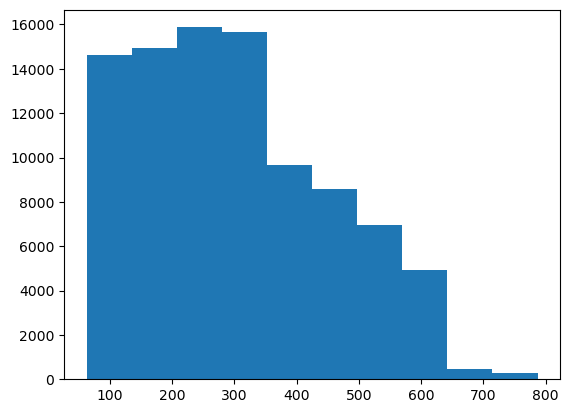

In [4]:
plt.hist(UOC_DF['recency'])

(0.0, 700.0)

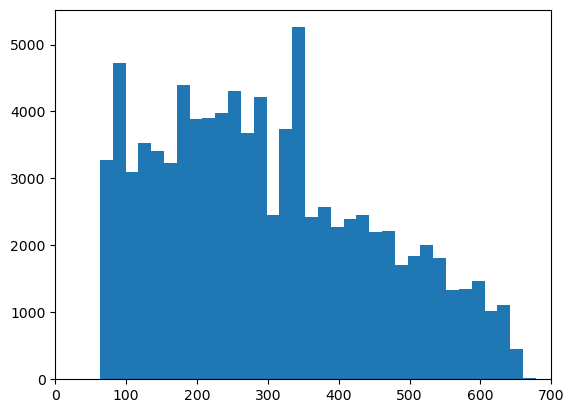

In [12]:
# same data, more detailed :
plt.hist(UOC_DF['recency'], bins=40)
plt.xlim(0,700)

(0.0, 1500.0)

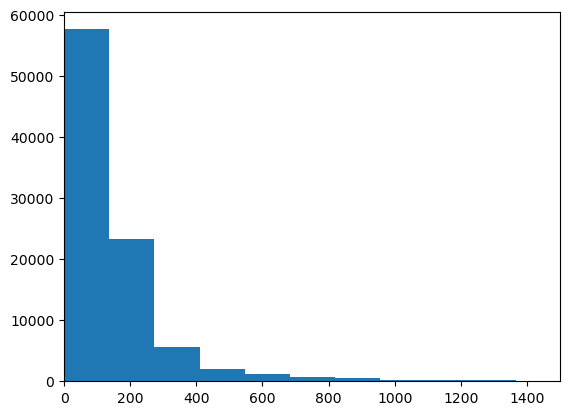

In [10]:
plt.hist(UOC_DF['order_amount'], bins=100)
plt.xlim(0,1500)

(0.0, 900.0)

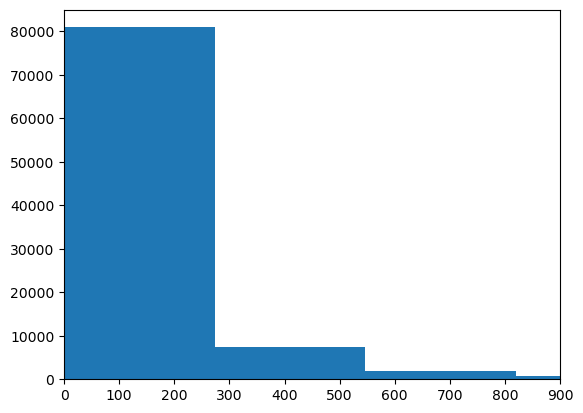

In [13]:
plt.hist(UOC_DF['order_amount'], bins=50)
plt.xlim(0,900)

(0.0, 600.0)

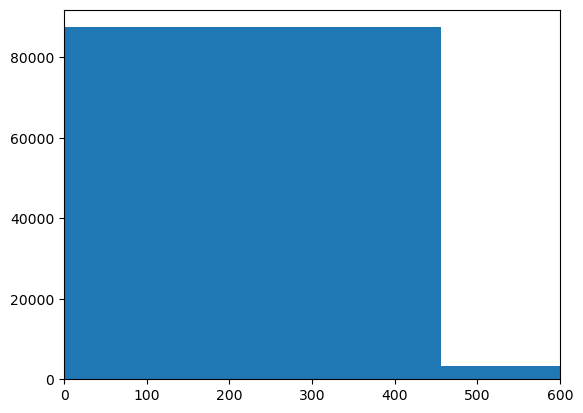

In [14]:
plt.hist(UOC_DF['order_amount'], bins=30)
plt.xlim(0,600)

(0.0, 1500.0)

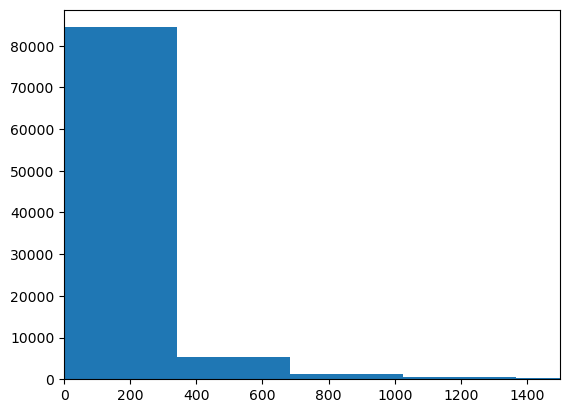

In [17]:
plt.hist(UOC_DF['order_amount'], bins=40)
plt.xlim(0,1500)

Concernant la récence, on a déjà une bonne idée de la répartition des clients, avec un pic de vente mi novembre 2017 environ, qui correspond probablement aux achats pour Noël.
<br>Par contre pour les montants, c'est un peu étrange car les ruptures changent de valeur selon la précision et l'étendue de l'histogramme, il est donc difficile de les localiser.
<br>Pour la récence, je vais changer ma date de référence pour la mettre au 31 août 2018 (à la première seconde) et ainsi commencer à 1. Et je vais faire **une segmentation par paquet de 30 jours pour les 21 premiers lots (soit 630 jours) et grouper les plus anciens dans un 22ième et dernier lot.**
<br>Pour le montant, je vais faire **une segmentation par paquet de 50 (réals, code BRL) jusqu'à 600, puis trois paquets de 100 (donc 600-700, 700-800 et 800-900) puis grouper les plus plus élevés dans un 16iéme et dernier lot.**
<br>Pour chaque groupe ainsi constitué, je vais créer un fichier donnant les détails des clients concernés, et établir un tableau récapitulatif.
<br>Le nom de chaque fichier permettra de connaitre les caractéristiques du groupe, ex. UOC_150-180_350-400.csv pour le groupe ayant une recence entre 150 et 180 jours et un montant entre 350 et 400 BRL.

In [19]:
# test
ref_date1 = datetime.strptime('2018-11-01 00:00:00','%Y-%m-%d %H:%M:%S')
ref_date2 = datetime.strptime('2018-08-31 00:00:00','%Y-%m-%d %H:%M:%S')
gap = (ref_date2 - ref_date1).days
gap

-62

In [20]:
UOC_DF['recency'] = UOC_DF['recency'] - 62
UOC_DF['recency'].describe()

count    92001.000000
mean       239.912273
std        153.208549
min          1.000000
25%        116.000000
50%        221.000000
75%        349.000000
max        725.000000
Name: recency, dtype: float64

In [21]:
# first recency group :
df_1to30_0to50 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                            (UOC_DF['order_amount'] <= 50), :]
df_1to30_50to100 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                              (UOC_DF['order_amount'] > 50) & \
                              (UOC_DF['order_amount'] <= 100), :]
df_1to30_100to150 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 100) & \
                               (UOC_DF['order_amount'] <= 150), :]
df_1to30_150to200 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 150) & \
                               (UOC_DF['order_amount'] <= 200), :]
df_1to30_200to250 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 200) & \
                               (UOC_DF['order_amount'] <= 250), :]
df_1to30_250to300 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 250) & \
                               (UOC_DF['order_amount'] <= 300), :]
df_1to30_300to350 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 300) & \
                               (UOC_DF['order_amount'] <= 350), :]
df_1to30_350to400 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 350) & \
                               (UOC_DF['order_amount'] <= 400), :]
df_1to30_400to450 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 400) & \
                               (UOC_DF['order_amount'] <= 450), :]
df_1to30_450to500 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 450) & \
                               (UOC_DF['order_amount'] <= 500), :]
df_1to30_500to550 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 500) & \
                               (UOC_DF['order_amount'] <= 550), :]
df_1to30_550to600 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 550) & \
                               (UOC_DF['order_amount'] <= 600), :]
df_1to30_600to700 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 600) & \
                               (UOC_DF['order_amount'] <= 700), :]
df_1to30_700to800 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 700) & \
                               (UOC_DF['order_amount'] <= 800), :]
df_1to30_800to900 = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 800) & \
                               (UOC_DF['order_amount'] <= 900), :]
df_1to30_900tomax = UOC_DF.loc[(UOC_DF['recency'] <= 30) & \
                               (UOC_DF['order_amount'] > 900), :]

In [23]:
# we are building a recap. dataframe at the same time :
filenames = ['df_1to30_0to50', 'df_1to30_50to100', 'df_1to30_100to150', \
             'df_1to30_150to200', 'df_1to30_200to250', 'df_1to30_250to300', \
             'df_1to30_300to350', 'df_1to30_350to400', 'df_1to30_400to450', \
             'df_1to30_450to500', 'df_1to30_500to550', 'df_1to30_550to600', \
             'df_1to30_600to700', 'df_1to30_700to800', 'df_1to30_800to900', \
             'df_1to30_900tomax']
counts = [len(df_1to30_0to50), len(df_1to30_50to100), len(df_1to30_100to150),\
          len(df_1to30_150to200), len(df_1to30_200to250), \
          len(df_1to30_250to300), len(df_1to30_300to350), \
          len(df_1to30_350to400), len(df_1to30_400to450), \
          len(df_1to30_450to500), len(df_1to30_500to550), \
          len(df_1to30_550to600), len(df_1to30_600to700), \
          len(df_1to30_700to800), len(df_1to30_800to900), \
          len(df_1to30_900tomax)]
counts

[1122, 2089, 1233, 782, 413, 217, 140, 104, 68, 41, 41, 36, 38, 30, 25, 87]

In [24]:
recap = pd.DataFrame({'filename': filenames,
                      'recency': [30 for i in range(16)],
                      'count': counts})
recap

,filename,recency,count
0,df_1to30_0to50,30,1122
1,df_1to30_50to100,30,2089
2,df_1to30_100to150,30,1233
3,df_1to30_150to200,30,782
4,df_1to30_200to250,30,413
5,df_1to30_250to300,30,217
6,df_1to30_300to350,30,140
7,df_1to30_350to400,30,104
8,df_1to30_400to450,30,68
9,df_1to30_450to500,30,41


In [25]:
df_1to30_550to600

,customer_unique_id,customer_id,order_purchase_date,order_id,order_status,order_amount,recency
1724,5212c50e79fe1349b9894f6508b401d8,9e1cf20c1585106f749e4e257194a11a,2018-08-21 21:18:33,133b607354fbff7447ce545c8a0fa407,delivered,598.25,9
6107,7c675c73c913ef2bc355178d845e7209,4a751dfba6004c315eaf88abf0ff249c,2018-08-23 18:19:17,a4725f98a7344d345bb2fab1c3c39c54,delivered,560.77,7
6832,ac6823dc21bd25c852134986a2c437c9,70abade22b2c1d02b2d43e5a185d8883,2018-08-01 11:31:23,12cbd6fae38a4bd1d77a7596eab0b7e1,delivered,553.53,29
6973,d20af6b0ad09b59c805eb438e3e42e8a,a2e7ca2b5d23adf8d5b5b3c6d37ec9ef,2018-08-02 22:18:32,a67a7dcbea2b5ce61ba8bc99ff7362db,delivered,591.88,28
7723,ca60b9db72eab0a9a76c77f60aeb845f,49d7f0f85143c703b82ff332b33a4dbc,2018-08-07 17:16:36,d4b4050ad0885ce84603e34ee06201ca,delivered,553.38,23
9511,5f32e35f44f6b94899759d719822b6c8,c77dedc3c3a28926c79150de11a1d2f0,2018-08-19 15:27:35,ddbee74a2a5acaf9c9c17fb5671e13a9,delivered,561.64,11
10247,156ad43d21fbedfa5be91be0b14bf73b,e1eb3c7b3b41539a48dcdd3b4367457e,2018-08-04 17:55:14,21e4cb49918b1d01621e459fc79a60d1,delivered,570.71,26
15180,92dbb8a519a6e824aaa5a53e3f62bb3b,4c5fca77428fad7b13c10da02622db4c,2018-08-02 17:07:12,bb048e358cc6dd3c087ba3b3ce36a190,delivered,568.51,28
15234,e90dc9258e140b61728e3745eacb26fe,9f60e945011f3dfd9ce6d82a939cf93f,2018-08-07 21:44:50,a1d38c97444889282dcb16502b3a8686,delivered,561.53,23
16875,5dfc12ff66fbee3b02210e2e98739d9e,2b4f66c5ead58995d8097a8f3bef9833,2018-08-02 22:00:40,6b51309cb191abb919de57f626c06719,delivered,587.09,28


In [29]:
# test
def get_df_name(df):
    '''Returns the dataframe name as a string from the dataframe name
    (as a dataframe has not a .name() method)'''
    name =[x for x in globals() if globals()[x] is df][0]
    return name

get_df_name(df_1to30_350to400)

'df_1to30_350to400'

In [40]:
# test
filename(get_df_name(df_1to30_350to400))

'UOC_1-30_350-400.csv'

In [44]:
# saving files :
def filename(name):
    '''Build the name of the file in which the dataframe will be saved,
    from the dataframe name''' 
    csv_name = 'UOC_'
    csv_name += name[3:]
    csv_name = csv_name.replace('to','-')
    csv_name += '.csv'
    return csv_name

files = [df_1to30_0to50, df_1to30_50to100, df_1to30_100to150,
         df_1to30_150to200, df_1to30_200to250, df_1to30_250to300,
         df_1to30_300to350, df_1to30_350to400, df_1to30_400to450,
         df_1to30_450to500, df_1to30_500to550, df_1to30_550to600,
         df_1to30_600to700, df_1to30_700to800, df_1to30_800to900,
         df_1to30_900tomax]
for df in files:
    df.to_csv(filename(get_df_name(df)))


In [45]:
# second recency group :
df_30to60_0to50 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                             (UOC_DF['recency'] <= 60) & \
                             (UOC_DF['order_amount'] <= 50), :]
df_30to60_50to100 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                               (UOC_DF['recency'] <= 60) & \
                               (UOC_DF['order_amount'] > 50) & \
                               (UOC_DF['order_amount'] <= 100), :]
df_30to60_100to150 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 100) & \
                                (UOC_DF['order_amount'] <= 150), :]
df_30to60_150to200 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 150) & \
                                (UOC_DF['order_amount'] <= 200), :]
df_30to60_200to250 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 200) & \
                                (UOC_DF['order_amount'] <= 250), :]
df_30to60_250to300 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 250) & \
                                (UOC_DF['order_amount'] <= 300), :]
df_30to60_300to350 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 300) & \
                                (UOC_DF['order_amount'] <= 350), :]
df_30to60_350to400 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 350) & \
                                (UOC_DF['order_amount'] <= 400), :]
df_30to60_400to450 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 400) & \
                                (UOC_DF['order_amount'] <= 450), :]
df_30to60_450to500 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 450) & \
                                (UOC_DF['order_amount'] <= 500), :]
df_30to60_500to550 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 500) & \
                                (UOC_DF['order_amount'] <= 550), :]
df_30to60_550to600 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 550) & \
                                (UOC_DF['order_amount'] <= 600), :]
df_30to60_600to700 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 600) & \
                                (UOC_DF['order_amount'] <= 700), :]
df_30to60_700to800 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 700) & \
                                (UOC_DF['order_amount'] <= 800), :]
df_30to60_800to900 = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 800) & \
                                (UOC_DF['order_amount'] <= 900), :]
df_30to60_900tomax = UOC_DF.loc[(UOC_DF['recency'] > 30) & \
                                (UOC_DF['recency'] <= 60) & \
                                (UOC_DF['order_amount'] > 900), :]

In [62]:
files = [df_30to60_0to50, df_30to60_50to100, df_30to60_100to150, \
         df_30to60_150to200, df_30to60_200to250, df_30to60_250to300, \
         df_30to60_300to350, df_30to60_350to400, df_30to60_400to450, \
         df_30to60_450to500, df_30to60_500to550, df_30to60_550to600, \
         df_30to60_600to700, df_30to60_700to800, df_30to60_800to900, \
         df_30to60_900tomax]
filenames = []
counts = []

for df in files :
    #name = get_df_name(df)                # doesn't work anymore !!??
    #print(name)
    #df.to_csv(filename(get_df_name(df)))
    #filenames.append(get_df_name(df))
    counts.append(len(df))

filenames = ['df_30to60_0to50', 'df_30to60_50to100', 'df_30to60_100to150', \
             'df_30to60_150to200', 'df_30to60_200to250', 'df_30to60_250to300',\
             'df_30to60_300to350', 'df_30to60_350to400', 'df_30to60_400to450',\
             'df_30to60_450to500', 'df_30to60_500to550', 'df_30to60_550to600',\
             'df_30to60_600to700', 'df_30to60_700to800', 'df_30to60_800to900',\
             'df_30to60_900tomax']

tmpdf = pd.DataFrame({'filename': filenames,
                      'recency': [60 for i in range(16)],
                      'count': counts})
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap

,filename,recency,count
0,df_1to30_0to50,30,1122
1,df_1to30_50to100,30,2089
2,df_1to30_100to150,30,1233
3,df_1to30_150to200,30,782
4,df_1to30_200to250,30,413
5,df_1to30_250to300,30,217
6,df_1to30_300to350,30,140
7,df_1to30_350to400,30,104
8,df_1to30_400to450,30,68
9,df_1to30_450to500,30,41


In [64]:
for ind, df in enumerate(files) :
    df.to_csv(filename(filenames[ind]))

In [65]:
recap.to_csv('recap.csv')

In [73]:
# let's automate a little more the process :
def create_df_recency(linf,lsup):
    '''Creates the dataframes end save them in files, from the inferior
    and superior limits of the recency values'''
    files_list = []
    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup) &\
                    (UOC_DF['order_amount'] <= 50), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_0-50.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 50) \
                    & (UOC_DF['order_amount'] <= 100), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_50-100.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))
    
    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 100) \
                    & (UOC_DF['order_amount'] <= 150), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_100-150.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))
    
    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 150) \
                    & (UOC_DF['order_amount'] <= 200), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_150-200.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))
    
    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 200) \
                    & (UOC_DF['order_amount'] <= 250), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_200-250.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 250) \
                    & (UOC_DF['order_amount'] <= 300), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_250-300.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 300) \
                    & (UOC_DF['order_amount'] <= 350), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_300-350.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 350) \
                    & (UOC_DF['order_amount'] <= 400), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_350-400.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 400) \
                    & (UOC_DF['order_amount'] <= 450), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_400-450.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 450) \
                    & (UOC_DF['order_amount'] <= 500), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_450-500.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 500) \
                    & (UOC_DF['order_amount'] <= 550), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_500-550.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 550) \
                    & (UOC_DF['order_amount'] <= 600), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_550-600.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 600) \
                    & (UOC_DF['order_amount'] <= 700), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_600-700.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 700) \
                    & (UOC_DF['order_amount'] <= 800), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_700-800.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 800) \
                    & (UOC_DF['order_amount'] <= 900), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_800-900.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))

    df = UOC_DF.loc[(UOC_DF['recency'] > linf) & (UOC_DF['recency'] <= lsup)\
                    & (UOC_DF['order_amount'] > 900), :]
    file_name = 'UOC_' + str(linf) + '-' + str(lsup) + '_900-max.csv'
    df.to_csv(file_name)
    files_list.append((file_name, len(df)))
    
    return files_list

flist = create_df_recency(60,90)
flist

[('UOC_60-90_0-50.csv', 970),
 ('UOC_60-90_50-100.csv', 1626),
 ('UOC_60-90_100-150.csv', 1253),
 ('UOC_60-90_150-200.csv', 734),
 ('UOC_60-90_200-250.csv', 413),
 ('UOC_60-90_250-300.csv', 201),
 ('UOC_60-90_300-350.csv', 156),
 ('UOC_60-90_350-400.csv', 105),
 ('UOC_60-90_400-450.csv', 70),
 ('UOC_60-90_450-500.csv', 56),
 ('UOC_60-90_500-550.csv', 42),
 ('UOC_60-90_550-600.csv', 23),
 ('UOC_60-90_600-700.csv', 46),
 ('UOC_60-90_700-800.csv', 31),
 ('UOC_60-90_800-900.csv', 39),
 ('UOC_60-90_900-max.csv', 81)]

In [75]:
# also, we are changing a little (improvement) the logic of 'recap':
recap['filename'] = recap['filename'].apply(lambda x: filename(x))
recap

,filename,recency,count
0,UOC_1-30_0-50.csv,30,1122
1,UOC_1-30_50-100.csv,30,2089
2,UOC_1-30_100-150.csv,30,1233
3,UOC_1-30_150-200.csv,30,782
4,UOC_1-30_200-250.csv,30,413
5,UOC_1-30_250-300.csv,30,217
6,UOC_1-30_300-350.csv,30,140
7,UOC_1-30_350-400.csv,30,104
8,UOC_1-30_400-450.csv,30,68
9,UOC_1-30_450-500.csv,30,41


In [79]:
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [90 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
tmpdf

,filename,recency,count
0,UOC_60-90_0-50.csv,90,970
1,UOC_60-90_50-100.csv,90,1626
2,UOC_60-90_100-150.csv,90,1253
3,UOC_60-90_150-200.csv,90,734
4,UOC_60-90_200-250.csv,90,413
5,UOC_60-90_250-300.csv,90,201
6,UOC_60-90_300-350.csv,90,156
7,UOC_60-90_350-400.csv,90,105
8,UOC_60-90_400-450.csv,90,70
9,UOC_60-90_450-500.csv,90,56


In [80]:
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap.tail()

,filename,recency,count
43,UOC_60-90_550-600.csv,90,23
44,UOC_60-90_600-700.csv,90,46
45,UOC_60-90_700-800.csv,90,31
46,UOC_60-90_800-900.csv,90,39
47,UOC_60-90_900-max.csv,90,81


In [81]:
flist = create_df_recency(90,120)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [120 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap.shape

(64, 3)

In [82]:
flist = create_df_recency(120,150)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [150 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap.shape

(80, 3)

In [83]:
flist = create_df_recency(150,180)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [180 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(180,210)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [210 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(210,240)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [240 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(240,270)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [270 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(270,300)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [300 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(300,330)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [330 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(330,360)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [360 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(360,390)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [390 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(390,420)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [420 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(420,450)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [450 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(450,480)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [480 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(480,510)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [510 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(510,540)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [540 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(540,570)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [570 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(570,600)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [600 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)

flist = create_df_recency(600,630)
tmpdf = pd.DataFrame({'filename': [flist[i][0] for i in range(16)], \
                      'recency': [630 for i in range(16)], \
                      'count': [flist[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap.shape

(336, 3)

In [84]:
# the last is a little different, so we have to write it manually again :
files_list = []

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] <= 50), :]
file_name = 'UOC_630-max_0-50.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 50) & \
                (UOC_DF['order_amount'] <= 100), :]
file_name = 'UOC_630-max_50-100.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 100) & \
                (UOC_DF['order_amount'] <= 150), :]
file_name = 'UOC_630-max_100-150.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 150) & \
                (UOC_DF['order_amount'] <= 200), :]
file_name = 'UOC_630-max_150-200.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 200) & \
                (UOC_DF['order_amount'] <= 250), :]
file_name = 'UOC_630-max_200-250.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 250) & \
                (UOC_DF['order_amount'] <= 300), :]
file_name = 'UOC_630-max_250-300.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 300) & \
                (UOC_DF['order_amount'] <= 350), :]
file_name = 'UOC_630-max_300-350.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 350) & \
                (UOC_DF['order_amount'] <= 400), :]
file_name = 'UOC_630-max_350-400.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 400) & \
                (UOC_DF['order_amount'] <= 450), :]
file_name = 'UOC_630-max_400-450.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 450) & \
                (UOC_DF['order_amount'] <= 500), :]
file_name = 'UOC_630-max_450-500.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 500) & \
                (UOC_DF['order_amount'] <= 550), :]
file_name = 'UOC_630-max_500-550.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 550) & \
                (UOC_DF['order_amount'] <= 600), :]
file_name = 'UOC_630-max_550-600.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 600) & \
                (UOC_DF['order_amount'] <= 700), :]
file_name = 'UOC_630-max_600-700.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 700) & \
                (UOC_DF['order_amount'] <= 800), :]
file_name = 'UOC_630-max_700-800.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 800) & \
                (UOC_DF['order_amount'] <= 900), :]
file_name = 'UOC_630-max_800-900.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))

df = UOC_DF.loc[(UOC_DF['recency'] > 630) & (UOC_DF['order_amount'] > 900), :]
file_name = 'UOC_630-max_900-max.csv'
df.to_csv(file_name)
files_list.append((file_name, len(df)))
    
files_list

[('UOC_630-max_0-50.csv', 42),
 ('UOC_630-max_50-100.csv', 87),
 ('UOC_630-max_100-150.csv', 50),
 ('UOC_630-max_150-200.csv', 31),
 ('UOC_630-max_200-250.csv', 11),
 ('UOC_630-max_250-300.csv', 17),
 ('UOC_630-max_300-350.csv', 8),
 ('UOC_630-max_350-400.csv', 6),
 ('UOC_630-max_400-450.csv', 6),
 ('UOC_630-max_450-500.csv', 2),
 ('UOC_630-max_500-550.csv', 2),
 ('UOC_630-max_550-600.csv', 1),
 ('UOC_630-max_600-700.csv', 10),
 ('UOC_630-max_700-800.csv', 2),
 ('UOC_630-max_800-900.csv', 1),
 ('UOC_630-max_900-max.csv', 4)]

In [85]:
tmpdf = pd.DataFrame({'filename': [files_list[i][0] for i in range(16)], \
                      'recency': [630 for i in range(16)], \
                      'count': [files_list[i][1] for i in range(16)]})
recap = pd.concat([recap, tmpdf], ignore_index=True)
recap.shape

(352, 3)

In [86]:
recap.to_csv('recap.csv')

**Nous avons maintenant notre segmentation avec tous les clients listés dans les fichiers correspondants à leurs groupes; Faisons donc un tableau offrant une vue d'ensemble :**

In [92]:
# test
testdf = recap.iloc[0:16,:]
testdf

,filename,recency,count
0,UOC_1-30_0-50.csv,30,1122
1,UOC_1-30_50-100.csv,30,2089
2,UOC_1-30_100-150.csv,30,1233
3,UOC_1-30_150-200.csv,30,782
4,UOC_1-30_200-250.csv,30,413
5,UOC_1-30_250-300.csv,30,217
6,UOC_1-30_300-350.csv,30,140
7,UOC_1-30_350-400.csv,30,104
8,UOC_1-30_400-450.csv,30,68
9,UOC_1-30_450-500.csv,30,41


In [93]:
# test
testdf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
filename,UOC_1-30_0-50.csv,UOC_1-30_50-100.csv,UOC_1-30_100-150.csv,UOC_1-30_150-200.csv,UOC_1-30_200-250.csv,UOC_1-30_250-300.csv,UOC_1-30_300-350.csv,UOC_1-30_350-400.csv,UOC_1-30_400-450.csv,UOC_1-30_450-500.csv,UOC_1-30_500-550.csv,UOC_1-30_550-600.csv,UOC_1-30_600-700.csv,UOC_1-30_700-800.csv,UOC_1-30_800-900.csv,UOC_1-30_900-max.csv
recency,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
count,1122,2089,1233,782,413,217,140,104,68,41,41,36,38,30,25,87


In [4]:
CounTab = pd.DataFrame({'1-30': [recap.iloc[i,2] for i in range(16)], \
                        '30-60': [recap.iloc[i,2] for i in range(16,32)], \
                        '60-90': [recap.iloc[i,2] for i in range(32,48)], \
                        '90-120': [recap.iloc[i,2] for i in range(48,64)], \
                        '120-150': [recap.iloc[i,2] for i in range(64,80)], \
                        '150-180': [recap.iloc[i,2] for i in range(80,96)], \
                        '180-210': [recap.iloc[i,2] for i in range(96,112)], \
                        '210-240': [recap.iloc[i,2] for i in range(112,128)], \
                        '240-270': [recap.iloc[i,2] for i in range(128,144)], \
                        '270-300': [recap.iloc[i,2] for i in range(144,160)], \
                        '300-330': [recap.iloc[i,2] for i in range(160,176)], \
                        '330-360': [recap.iloc[i,2] for i in range(176,192)], \
                        '360-390': [recap.iloc[i,2] for i in range(192,208)], \
                        '390-420': [recap.iloc[i,2] for i in range(208,224)], \
                        '420-450': [recap.iloc[i,2] for i in range(224,240)], \
                        '450-480': [recap.iloc[i,2] for i in range(240,256)], \
                        '480-510': [recap.iloc[i,2] for i in range(256,272)], \
                        '510-540': [recap.iloc[i,2] for i in range(272,288)], \
                        '540-570': [recap.iloc[i,2] for i in range(288,304)], \
                        '570-600': [recap.iloc[i,2] for i in range(304,320)], \
                        '600-630': [recap.iloc[i,2] for i in range(320,336)], \
                        '630-max': [recap.iloc[i,2] for i in range(336,352)]})
CounTab

,1-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300,...,360-390,390-420,420-450,450-480,480-510,510-540,540-570,570-600,600-630,630-max
0,1122,937,970,1002,1068,1089,1264,1220,794,1239,...,597,625,496,548,439,444,365,175,10,42
1,2089,1676,1626,1888,1960,1920,1929,1957,1489,2207,...,1229,1189,944,996,693,701,537,270,2,87
2,1233,1102,1253,1247,1316,1200,1340,1315,1050,1415,...,726,729,591,730,488,489,370,191,1,50
3,782,704,734,796,849,923,821,876,611,889,...,427,428,324,336,233,230,195,111,1,31
4,413,399,413,448,462,399,427,427,338,425,...,239,286,180,211,170,149,103,70,0,11
5,217,198,201,180,245,222,216,213,189,259,...,117,113,88,106,94,74,62,33,0,17
6,140,121,156,165,174,171,154,166,98,201,...,85,77,61,68,77,88,38,28,0,8
7,104,101,105,88,109,108,97,107,81,121,...,57,69,62,57,50,41,40,35,0,6
8,68,54,70,63,68,61,83,83,58,97,...,33,37,19,37,29,25,21,19,0,6
9,41,42,56,48,43,55,52,38,28,40,...,27,21,17,40,21,16,14,9,0,2


In [6]:
Seg_sizes = CounTab.T

In [11]:
# below : doesn't work
Seg_sizes = Seg_sizes.rename(columns={'0':'0-50','1':'50-100','2':'100-150',\
                                      '3':'150-200','4':'200-250','5':'250-300',\
                                      '6':'300-350','7':'350-400','8':'400-450',\
                                      '9':'450-500','10':'500-550',\
                                      '11':'550-600','12':'600-700',\
                                      '13':'700-800','14':'800-900',\
                                      '15':'900-max'})

In [15]:
Seg_sizes.columns = ['0-50','50-100','100-150','150-200','200-250','250-300',\
                     '300-350','350-400','400-450','450-500','500-550',\
                     '550-600','600-700','700-800','800-900','900-max']

In [16]:
Seg_sizes
# below the recap. array of segments sizes, lines are the recency and
# columns the orders amounts :

,0-50,50-100,100-150,150-200,200-250,250-300,300-350,350-400,400-450,450-500,500-550,550-600,600-700,700-800,800-900,900-max
1-30,1122,2089,1233,782,413,217,140,104,68,41,41,36,38,30,25,87
30-60,937,1676,1102,704,399,198,121,101,54,42,55,40,34,25,33,83
60-90,970,1626,1253,734,413,201,156,105,70,56,42,23,46,31,39,81
90-120,1002,1888,1247,796,448,180,165,88,63,48,40,25,59,38,34,112
120-150,1068,1960,1316,849,462,245,174,109,68,43,40,45,48,25,34,114
150-180,1089,1920,1200,923,399,222,171,108,61,55,48,57,52,25,24,102
180-210,1264,1929,1340,821,427,216,154,97,83,52,22,46,44,43,20,56
210-240,1220,1957,1315,876,427,213,166,107,83,38,34,25,63,30,28,80
240-270,794,1489,1050,611,338,189,98,81,58,28,24,12,67,13,7,46
270-300,1239,2207,1415,889,425,259,201,121,97,40,42,22,80,48,21,89


In [17]:
Seg_sizes.to_csv('UOC_seg_sizes.csv')

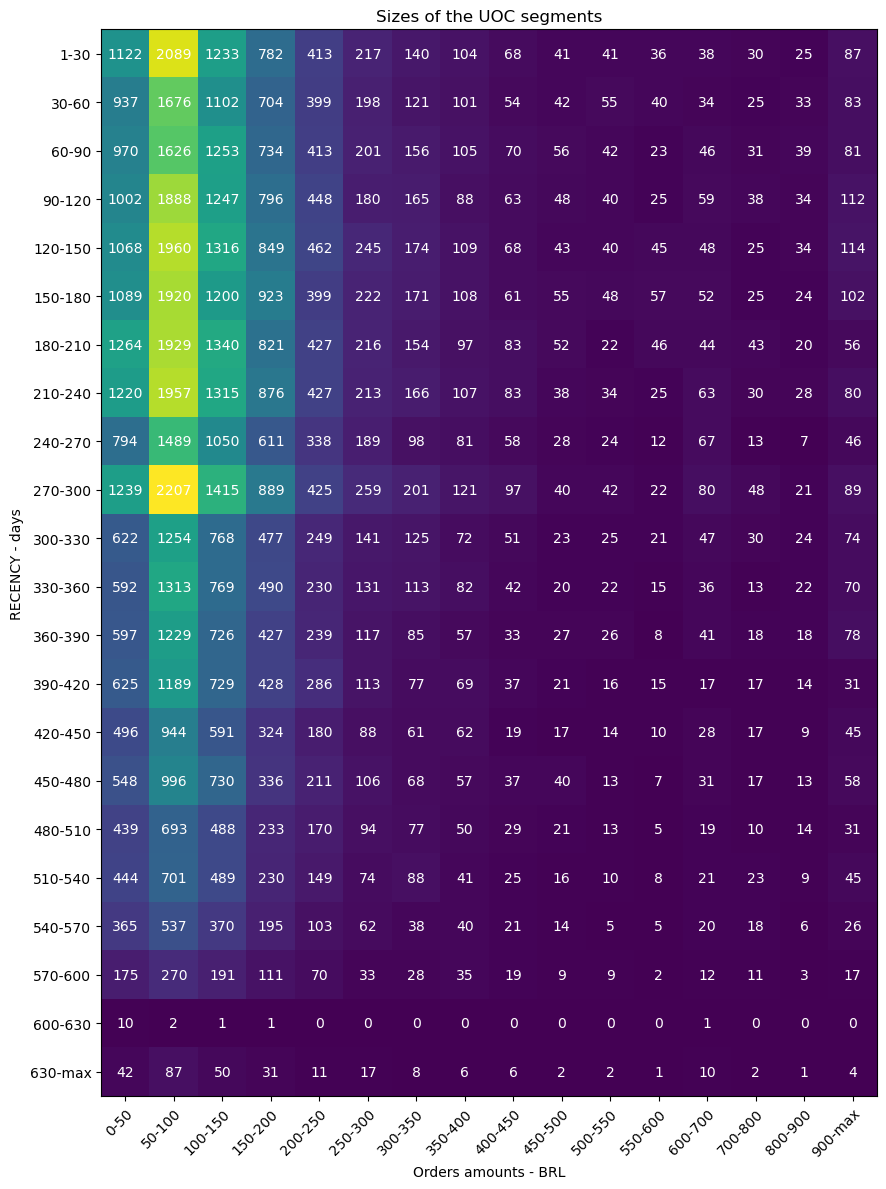

In [23]:
# a heatmap will be more expressive !
segsizes = Seg_sizes.values

fig, graph = plt.subplots()
fig.set_size_inches(12,12)
im = graph.imshow(segsizes)
graph.set_xticks(np.arange(16), labels=Seg_sizes.columns)
graph.set_yticks(np.arange(22), labels=Seg_sizes.index)
plt.setp(graph.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(22):
    for j in range(16):
        text = graph.text(j, i, segsizes[i, j], ha="center", va="center",
                          color="w")
graph.set_title('Sizes of the UOC segments')
graph.set_xlabel('Orders amounts - BRL')
graph.set_ylabel('RECENCY - days')
fig.tight_layout()
plt.show()

Nous allons continuer ce travail de segmentation, d'abord pour les 'MOC' (pour lesquels on peut définir une fréquence donc obtenir véritablement une segmentation 'RFM') dans un autre notebook : 'modelisation'.